In [1]:
import pandas as pd
import random
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
tf.keras.utils.set_random_seed(123)
random.seed(123)

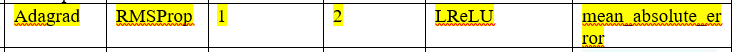

In [2]:
wine = datasets.load_wine(as_frame=True)

data = wine.data
target = wine.target
batchSize = 10
drop_out=0.2
unique=np.unique(target)
num_classes=3
wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols   
 0      14.23        1.71  2.43               15.6      127.0           2.80  \
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [3]:

x_train, x_test, y_train,y_test = train_test_split(data, target,random_state = 1,test_size=0.2,shuffle=True)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [4]:
inp = tf.keras.layers.Input(shape=(13,)) 
dropout1 =  tf.keras.layers.Dropout(drop_out)(inp)
hidden_1 =  tf.keras.layers.Dense(80, activation='LeakyReLU')(dropout1)
out =  tf.keras.layers.Dense(3, activation='softmax')(hidden_1)

model1 = tf.keras.Model(inputs=inp, outputs=out)


In [5]:
model1.compile(optimizer = tf.keras.optimizers.Adagrad(),
               loss = 'mean_absolute_error',
               metrics=['accuracy'])
model1.fit(x_train,y_train,epochs=120,batch_size=batchSize)

Epoch 1/120
15/15 [==============================] - 1s 2ms/step - loss: 0.5056 - accuracy: 0.1338
Epoch 2/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.1831
Epoch 3/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.1761
Epoch 4/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.1549
Epoch 5/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.2324
Epoch 6/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.2183
Epoch 7/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.1972
Epoch 8/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.2254
Epoch 9/120
15/15 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.2817
Epoch 10/120
15/15 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.3169
Epoch 11/

In [6]:
inp1 = tf.keras.layers.Input(shape=(13,))
dropout11 =  tf.keras.layers.Dropout(.3)(inp1)
hidden_11 =  tf.keras.layers.Dense(64, activation='LeakyReLU')(dropout11) 
out1 =  tf.keras.layers.Dense(3, activation='softmax')(hidden_11)

model2 = tf.keras.Model(inputs=inp1, outputs=out1)

In [7]:
model2.compile(optimizer = tf.keras.optimizers.RMSprop(),
        loss = 'mean_absolute_error',
               metrics=['accuracy'])

In [8]:
model2.fit(x_train,y_train, epochs = 25, batch_size = batchSize)

Epoch 1/25
15/15 [==============================] - 1s 2ms/step - loss: 0.2975 - accuracy: 0.7042
Epoch 2/25
15/15 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.7887
Epoch 3/25
15/15 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.8944
Epoch 4/25
15/15 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9155
Epoch 5/25
15/15 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.8732
Epoch 6/25
15/15 [==============================] - 0s 1ms/step - loss: 0.1007 - accuracy: 0.9437
Epoch 7/25
15/15 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 0.9085
Epoch 8/25
15/15 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9085
Epoch 9/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9225
Epoch 10/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9366
Epoch 11/25
15/15 [

In [9]:
inp2 = tf.keras.layers.Input(shape=(13,))
hidden_12 =  tf.keras.layers.Dense(64, activation='LeakyReLU')(inp2)
dropout12 =  tf.keras.layers.Dropout(.2)(hidden_12)
hidden_22 =  tf.keras.layers.Dense(64, activation='LeakyReLU')(dropout12) 
out2 =  tf.keras.layers.Dense(3, activation='softmax')(hidden_22)

model3 = tf.keras.Model(inputs=inp2, outputs=out2)

model3.compile(optimizer = tf.keras.optimizers.Adagrad(),
               loss = 'mean_absolute_error',
               metrics=['accuracy'])

In [10]:
model3.fit(x_train,y_train, epochs = 120, batch_size = batchSize)

Epoch 1/120
15/15 [==============================] - 1s 2ms/step - loss: 0.4312 - accuracy: 0.3873
Epoch 2/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.3873
Epoch 3/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.4718
Epoch 4/120
15/15 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.5070
Epoch 5/120
15/15 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.5563
Epoch 6/120
15/15 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.5986
Epoch 7/120
15/15 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.6127
Epoch 8/120
15/15 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.6408
Epoch 9/120
15/15 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.6338
Epoch 10/120
15/15 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.7113
Epoch 11/

In [11]:
inp3 = tf.keras.layers.Input(shape=(13,)) 
hidden_13 =  tf.keras.layers.Dense(64, activation='LeakyReLU')(inp3)
dropout13 =  tf.keras.layers.Dropout(.3)(hidden_13)
hidden_23 =  tf.keras.layers.Dense(64, activation='LeakyReLU')(dropout13) 
out3 =  tf.keras.layers.Dense(3, activation='softmax')(hidden_23)

model4 = tf.keras.Model(inputs=inp3, outputs=out3)

model4.compile(optimizer = tf.keras.optimizers.RMSprop(),
               loss = 'mean_absolute_error',
               metrics=['accuracy'])

In [12]:
model4.fit(x_train,y_train, epochs = 25, batch_size = batchSize)

Epoch 1/25
15/15 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.6479
Epoch 2/25
15/15 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9155
Epoch 3/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9648
Epoch 4/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9789
Epoch 5/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9930
Epoch 6/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9859
Epoch 7/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9930
Epoch 8/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9859
Epoch 9/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.9859
Epoch 10/25
15/15 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9859
Epoch 11/25
15/15 [

In [13]:
loss_value1, accuracy_value1 = model1.evaluate(x_test,y_test,batch_size=batchSize)
loss_value2, accuracy_value2 = model2.evaluate(x_test,y_test,batch_size=batchSize, verbose = 0)
loss_value3, accuracy_value3 = model3.evaluate(x_test,y_test,batch_size=batchSize, verbose = 0)
loss_value4, accuracy_value4 = model4.evaluate(x_test,y_test,batch_size=batchSize, verbose = 0)

4/4 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.8889


In [14]:
d = {'model1': [loss_value1, accuracy_value1],
     'model2': [loss_value2,  accuracy_value2],
     'model3': [loss_value3, accuracy_value3],
     'model4': [loss_value4,  accuracy_value4]}

df = pd.DataFrame(data=d, index=["loss_value", "accuracy_value"])
df

,model1,model2,model3,model4
loss_value,0.161475,0.020721,0.103571,0.011592
accuracy_value,0.888889,0.972222,0.944444,1.000000


In [15]:
i = 0.1
iList = []
temp1 = []
temp2 = []
temp3 = []
temp4 = []

while i <= 0.9:
    x_train, x_test, y_train, y_test = train_test_split(data, target,random_state = 1, test_size=i, shuffle=True)
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes)
    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    model1.fit(x_train, y_train, epochs = 120, batch_size = batchSize, verbose = 0)
    model2.fit(x_train, y_train, epochs = 25, batch_size = batchSize, verbose = 0)
    model3.fit(x_train, y_train, epochs = 120, batch_size = batchSize, verbose = 0)
    model4.fit(x_train, y_train, epochs = 25, batch_size = batchSize, verbose = 0)
    
    loss_value1, accuracy_value1 = model1.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    loss_value2, accuracy_value2 = model2.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    loss_value3, accuracy_value3 = model3.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    loss_value4, accuracy_value4 = model4.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    #print(accuracy_value1)
    
    temp1.append({'Model1': accuracy_value1,'Model2': accuracy_value2, 'Model3': accuracy_value3, 'Model4': accuracy_value4})
    temp2.append({'Model1': loss_value1, 'Model2': loss_value2, 'Model3': loss_value3, 'Model4': loss_value4})
    
    loss_value1, accuracy_value1 = model1.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    loss_value2, accuracy_value2 = model2.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    loss_value3, accuracy_value3 = model3.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    loss_value4, accuracy_value4 = model4.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    #print(accuracy_value1)
    
    temp3.append({'Model1': accuracy_value1,'Model2': accuracy_value2, 'Model3': accuracy_value3, 'Model4': accuracy_value4})
    temp4.append({'Model1': loss_value1, 'Model2': loss_value2, 'Model3': loss_value3, 'Model4': loss_value4})
    
    iList.append(round(i,1))
    i += 0.1

accuracyDataTrain = pd.DataFrame(temp1)
lossDataTrain = pd.DataFrame(temp2)
accuracyDataTest = pd.DataFrame(temp3)
lossDataTest = pd.DataFrame(temp4)

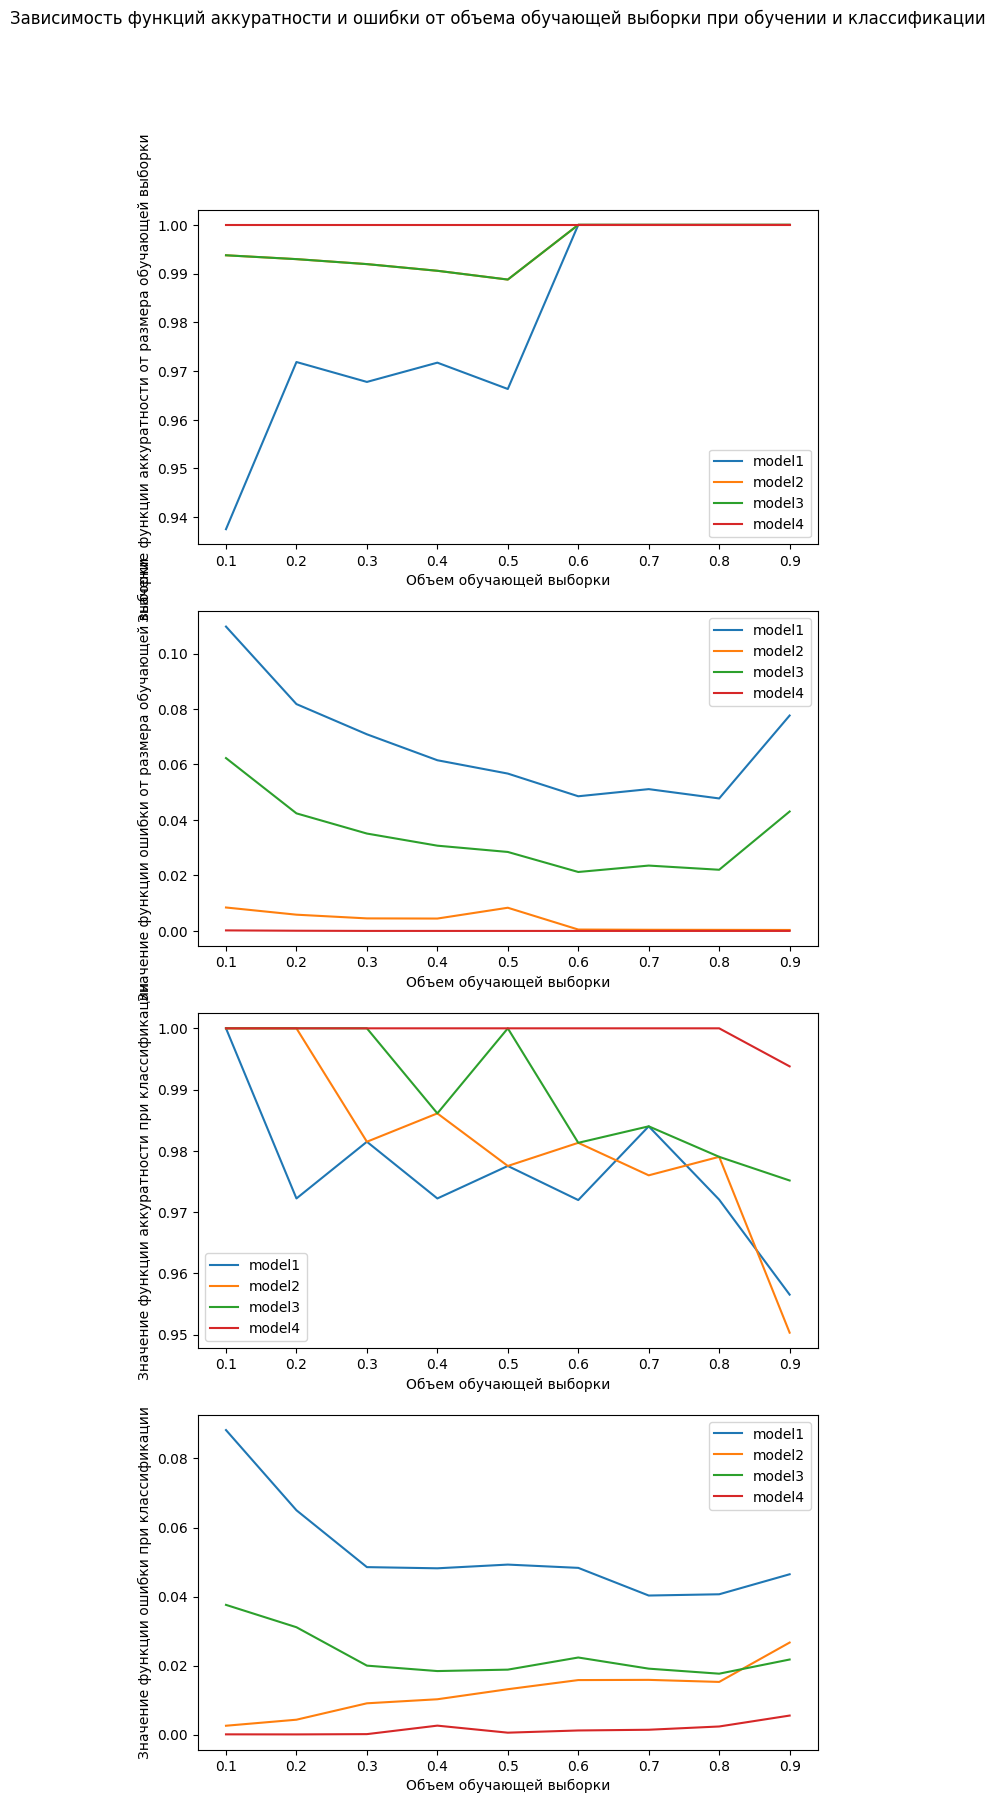

In [16]:

from matplotlib import pyplot as plt
fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(8, 20))
fig.suptitle('Зависимость функций аккуратности и ошибки от объема обучающей выборки при обучении и классификации')
x_lable='Объем обучающей выборки'
y1_lable='Значение функции аккуратности от размера обучающей выборки'
y2_lable='Значение функции ошибки от размера обучающей выборки'
y3_lable='Значение функции аккуратности при классификации'
y4_lable='Значение функции ошибки при классификации'

ax1.set_xlabel(x_lable) 
ax1.set_ylabel(y1_lable)
ax2.set_xlabel(x_lable) 
ax2.set_ylabel(y2_lable)
ax3.set_xlabel(x_lable) 
ax3.set_ylabel(y3_lable)
ax4.set_xlabel(x_lable) 
ax4.set_ylabel(y4_lable)

ax1.plot(iList, accuracyDataTrain.Model1, label='model1') 
ax1.plot(iList, accuracyDataTrain.Model2, label='model2')
ax1.plot(iList, accuracyDataTrain.Model3, label='model3') 
ax1.plot(iList, accuracyDataTrain.Model4, label='model4')

ax2.plot(iList, lossDataTrain.Model1, label='model1') 
ax2.plot(iList, lossDataTrain.Model2, label='model2')
ax2.plot(iList, lossDataTrain.Model3, label='model3') 
ax2.plot(iList, lossDataTrain.Model4, label='model4')

ax3.plot(iList, accuracyDataTest.Model1, label='model1') 
ax3.plot(iList, accuracyDataTest.Model2, label='model2')
ax3.plot(iList, accuracyDataTest.Model3, label='model3') 
ax3.plot(iList, accuracyDataTest.Model4, label='model4')

ax4.plot(iList, lossDataTest.Model1, label='model1') 
ax4.plot(iList, lossDataTest.Model2, label='model2')
ax4.plot(iList, lossDataTest.Model3, label='model3') 
ax4.plot(iList, lossDataTest.Model4, label='model4')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In [17]:
iList = []
temp1 = []
temp2 = []
temp3 = []
temp4 = []
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
i = 1

while i <= 40:
    
    model1.fit(x_train, y_train, epochs = i, batch_size = batchSize, verbose = 0)
    model2.fit(x_train, y_train, epochs = i, batch_size = batchSize, verbose = 0)
    model3.fit(x_train, y_train, epochs = i, batch_size = batchSize, verbose = 0)
    model4.fit(x_train, y_train, epochs = i, batch_size = batchSize, verbose = 0)
    
    loss_value1, accuracy_value1 = model1.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    loss_value2, accuracy_value2 = model2.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    loss_value3, accuracy_value3 = model3.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    loss_value4, accuracy_value4 = model4.evaluate(x_train , y_train, batch_size=batchSize, verbose = 0)
    
    temp1.append({'Model1': accuracy_value1,'Model2': accuracy_value2, 'Model3': accuracy_value3, 'Model4': accuracy_value4})
    temp2.append({'Model1': loss_value1, 'Model2': loss_value2, 'Model3': loss_value3, 'Model4': loss_value4})
    
    loss_value1, accuracy_value1 = model1.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    loss_value2, accuracy_value2 = model2.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    loss_value3, accuracy_value3 = model3.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    loss_value4, accuracy_value4 = model4.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    
    temp3.append({'Model1': accuracy_value1,'Model2': accuracy_value2, 'Model3': accuracy_value3, 'Model4': accuracy_value4})
    temp4.append({'Model1': loss_value1, 'Model2': loss_value2, 'Model3': loss_value3, 'Model4': loss_value4})
    
    iList.append(round(i,0))
    i += 10

accuracyDataTrain = pd.DataFrame(temp1)
lossDataTrain = pd.DataFrame(temp2)
accuracyDataTest = pd.DataFrame(temp3)
lossDataTest = pd.DataFrame(temp4)

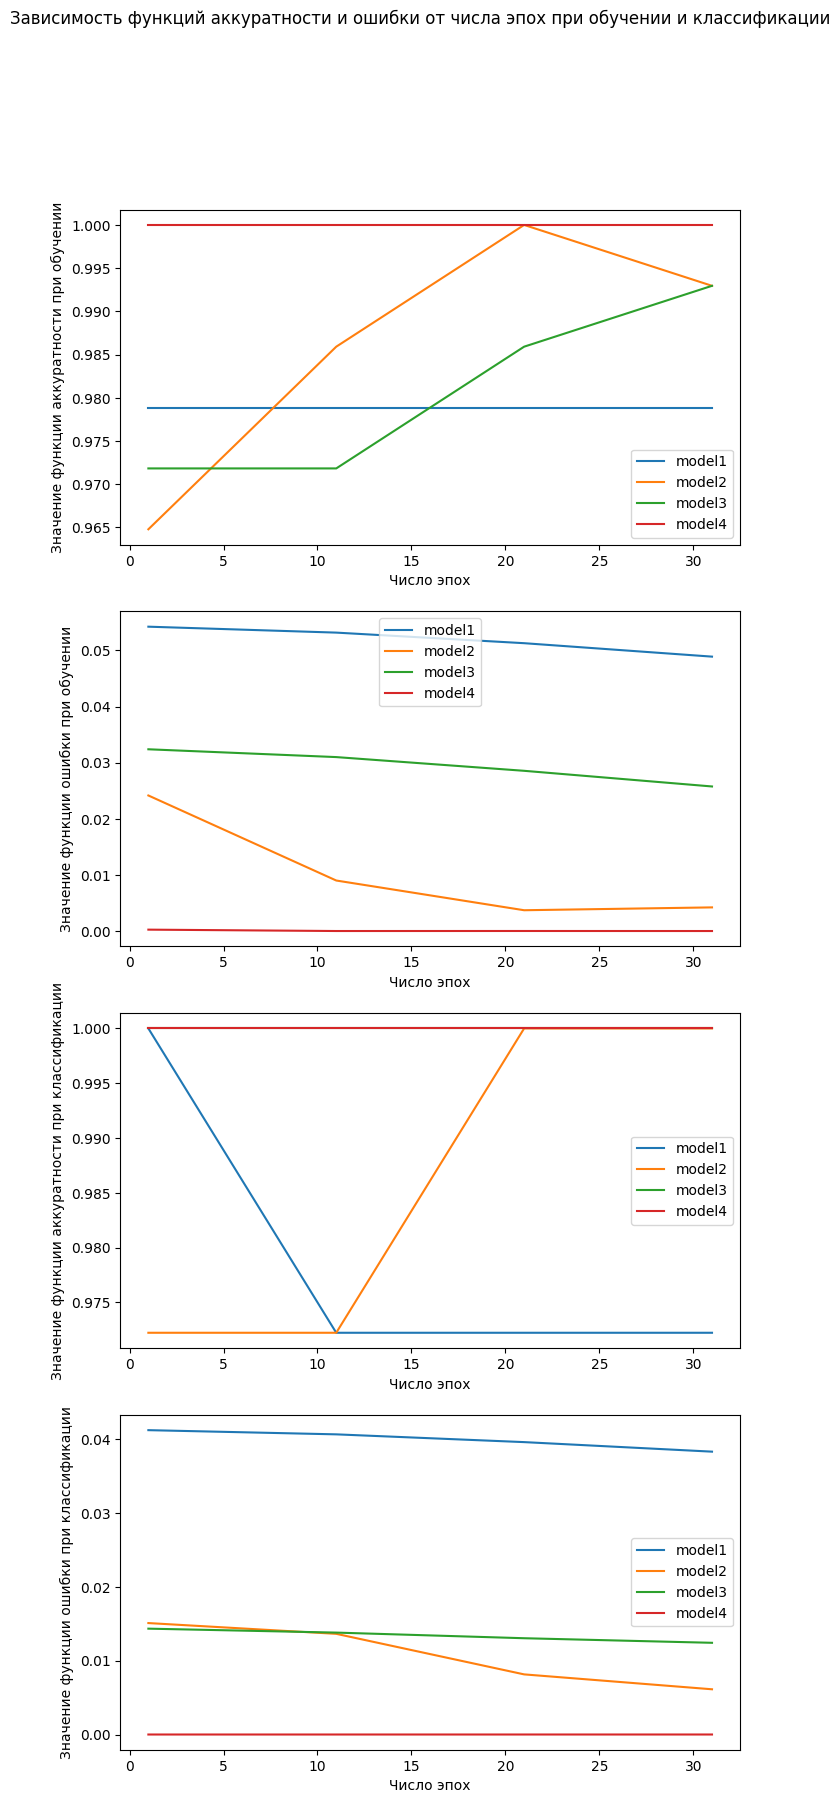

In [18]:
from matplotlib import pyplot as plt
fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(8, 20))
fig.suptitle('Зависимость функций аккуратности и ошибки от числа эпох при обучении и классификации')
x_lable='Число эпох'
y1_lable='Значение функции аккуратности при обучении'
y2_lable='Значение функции ошибки при обучении'
y3_lable='Значение функции аккуратности при классификации'
y4_lable='Значение функции ошибки при классификации'

ax1.set_xlabel(x_lable) 
ax1.set_ylabel(y1_lable)
ax2.set_xlabel(x_lable) 
ax2.set_ylabel(y2_lable)
ax3.set_xlabel(x_lable) 
ax3.set_ylabel(y3_lable)
ax4.set_xlabel(x_lable) 
ax4.set_ylabel(y4_lable)

ax1.plot(iList, accuracyDataTrain.Model1, label='model1') 
ax1.plot(iList, accuracyDataTrain.Model2, label='model2')
ax1.plot(iList, accuracyDataTrain.Model3, label='model3') 
ax1.plot(iList, accuracyDataTrain.Model4, label='model4')

ax2.plot(iList, lossDataTrain.Model1, label='model1') 
ax2.plot(iList, lossDataTrain.Model2, label='model2')
ax2.plot(iList, lossDataTrain.Model3, label='model3') 
ax2.plot(iList, lossDataTrain.Model4, label='model4')

ax3.plot(iList, accuracyDataTest.Model1, label='model1') 
ax3.plot(iList, accuracyDataTest.Model2, label='model2')
ax3.plot(iList, accuracyDataTest.Model3, label='model3') 
ax3.plot(iList, accuracyDataTest.Model4, label='model4')

ax4.plot(iList, lossDataTest.Model1, label='model1') 
ax4.plot(iList, lossDataTest.Model2, label='model2')
ax4.plot(iList, lossDataTest.Model3, label='model3') 
ax4.plot(iList, lossDataTest.Model4, label='model4')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In [19]:
x_train, x_test, y_train,y_test = train_test_split(data, target, random_state=652, test_size=0.2, shuffle=True)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model1.fit(x_train,y_train, epochs = 120, batch_size = batchSize, verbose = 0)
model2.fit(x_train,y_train, epochs = 25, batch_size = batchSize, verbose = 0)
model3.fit(x_train,y_train, epochs = 120, batch_size = batchSize, verbose = 0)
model4.fit(x_train,y_train, epochs = 25, batch_size = batchSize, verbose = 0)

    
true_labels = np.argmax(y_test, axis = 1)
print(true_labels)
pred1 = model1.predict(x_test)
pred1 = np.argmax(pred1, axis =1)
pred2 = model2.predict(x_test)
pred2 = np.argmax(pred2, axis =1)
pred3 = model3.predict(x_test)
pred3 = np.argmax(pred3, axis =1)
pred4 = model4.predict(x_test)
pred4 = np.argmax(pred4, axis =1)

#print("Значения метрик для model1")
#print(classification_report(true_labels, pred1, zero_division=0))
#print("Значения метрик для model2")
#print(classification_report(true_labels, pred2, zero_division=0))
print("Значения метрик для model3")
print(classification_report(true_labels, pred3, zero_division=0))
print("Значения метрик для model4")
print(classification_report(true_labels, pred4, zero_division=0))

[1 1 0 0 1 1 2 2 1 1 1 0 0 2 2 0 1 1 0 1 0 1 1 1 2 1 0 1 2 2 1 1 0 2 1 1]
2/2 [==============================] - 0s 2ms/step
Значения метрик для model3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Значения метрик для model4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Площадь AUC model1 - 1.0
Площадь AUC model2 - 1.0
Площадь AUC model3 - 1.0
Площадь AUC model4 - 1.0


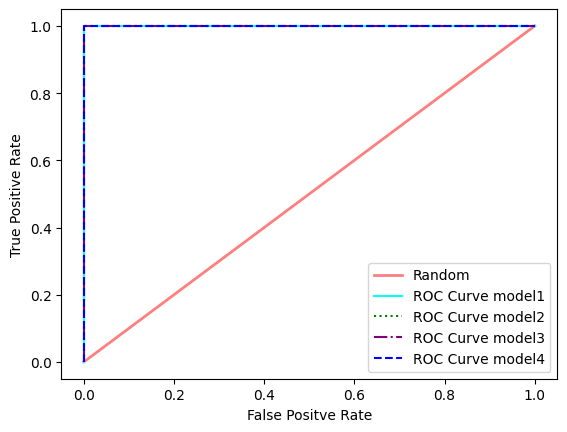

In [20]:
fpr1, tpr1, thresholds1 = roc_curve(true_labels, pred1, pos_label=2)
fpr2, tpr2, thresholds2 = roc_curve(true_labels, pred2, pos_label=2)
fpr3, tpr3, thresholds3 = roc_curve(true_labels, pred3, pos_label=2)
fpr4, tpr4, thresholds4 = roc_curve(true_labels, pred4, pos_label=2)
auc_score1 = auc(fpr1, tpr1)
auc_score2 = auc(fpr2, tpr2)
auc_score3 = auc(fpr3, tpr3)
auc_score4 = auc(fpr4, tpr4)
print("Площадь AUC model1 - " + str(auc_score1))
print("Площадь AUC model2 - " + str(auc_score2))
print("Площадь AUC model3 - " + str(auc_score3))
print("Площадь AUC model4 - " + str(auc_score4))
plt.plot([0, 1], [0, 1], lw=2, color='r',label='Random', alpha=0.5)
plt.plot(fpr1,tpr1, label="ROC Curve model1",color="cyan")
plt.plot(fpr2,tpr2, label="ROC Curve model2",color="green", linestyle='dotted')
plt.plot(fpr3,tpr3, label="ROC Curve model3",color="purple", linestyle='dashdot')
plt.plot(fpr4,tpr4, label="ROC Curve model4",color="blue", linestyle='--')
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Confusion matrics для model1


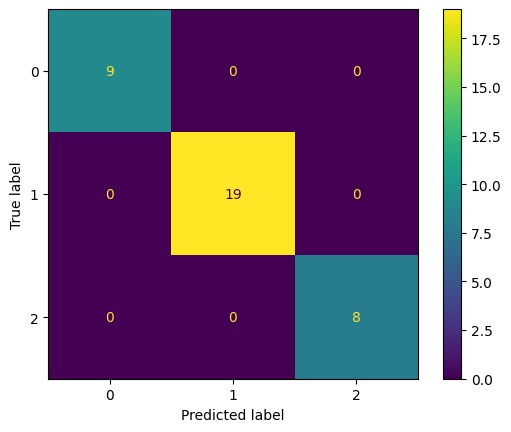

In [21]:
print("Confusion matrics для model1")
cm = confusion_matrix(true_labels, pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Confusion matrics для model2


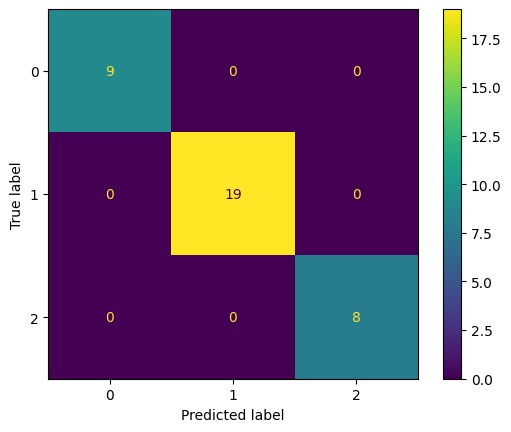

In [22]:
print("Confusion matrics для model2")
cm = confusion_matrix(true_labels, pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Confusion matrics для model3


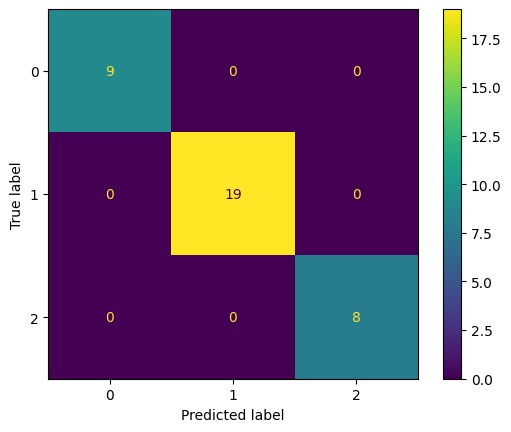

In [23]:
print("Confusion matrics для model3")
cm = confusion_matrix(true_labels, pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Confusion matrics для model4


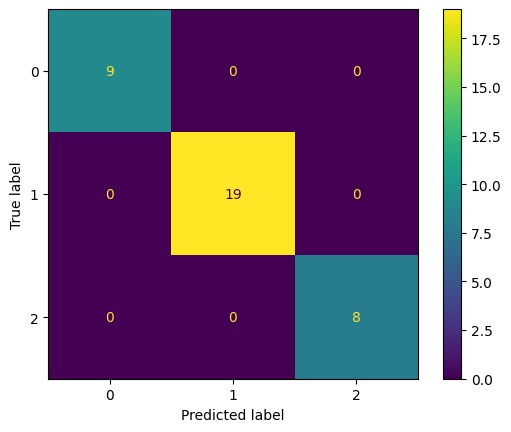

In [24]:
print("Confusion matrics для model4")
cm = confusion_matrix(true_labels, pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
i = 0.2
iList = []
temp1 = []
temp2 = []
temp3 = []
temp4 = []
x_train, x_test, y_train,y_test = train_test_split(data, target, random_state=1,test_size=i,shuffle=True)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

while i <= 0.5:
    
    inp_dr = tf.keras.layers.Input(shape=(13,)) 
    dropout1_dr =  tf.keras.layers.Dropout(i)(inp_dr)
    hidden_1_dr =  tf.keras.layers.Dense(64, activation='LeakyReLU')(dropout1_dr)
    out_dr =  tf.keras.layers.Dense(3, activation='softmax')(hidden_1_dr)
    model1_dr = tf.keras.Model(inputs=inp_dr, outputs=out_dr)
    model1_dr.compile(optimizer = tf.keras.optimizers.Adagrad(),
    loss = 'mean_absolute_error',
    metrics=['accuracy'])
    model1_dr.fit(x_train,y_train,epochs=120,batch_size=batchSize, verbose = 0)
    
    
    inp1_dr = tf.keras.layers.Input(shape=(13,))
    dropout11_dr =  tf.keras.layers.Dropout(i)(inp1_dr)
    hidden_11_dr =  tf.keras.layers.Dense(64, activation='LeakyReLU')(dropout11_dr) 
    out1_dr =  tf.keras.layers.Dense(3, activation='softmax')(hidden_11_dr)
    model2_dr = tf.keras.Model(inputs=inp1_dr, outputs=out1_dr)
    model2_dr.compile(optimizer = tf.keras.optimizers.RMSprop(),
    loss = 'mean_absolute_error',
    metrics =['accuracy'])
    model2_dr.fit(x_train,y_train, epochs = 25, batch_size = batchSize, verbose = 0)
    
    
    inp2_dr = tf.keras.layers.Input(shape=(13,))
    hidden_12_dr =  tf.keras.layers.Dense(64, activation='LeakyReLU')(inp2_dr)
    dropout12_dr =  tf.keras.layers.Dropout(i)(hidden_12_dr)
    hidden_22_dr =  tf.keras.layers.Dense(64, activation='LeakyReLU')(dropout12_dr) 
    out2_dr =  tf.keras.layers.Dense(3, activation='softmax')(hidden_22_dr)
    model3_dr = tf.keras.Model(inputs=inp2_dr, outputs=out2_dr)
    model3_dr.compile(optimizer = tf.keras.optimizers.Adagrad(),
    loss = 'mean_absolute_error',
    metrics =['accuracy'])
    model3_dr.fit(x_train,y_train, epochs = 120, batch_size = batchSize, verbose = 0)
    
    
    inp3_dr = tf.keras.layers.Input(shape=(13,)) 
    hidden_13_dr =  tf.keras.layers.Dense(64, activation='LeakyReLU')(inp3_dr)
    dropout13_dr =  tf.keras.layers.Dropout(i)(hidden_13_dr)
    hidden_23_dr =  tf.keras.layers.Dense(64, activation='LeakyReLU')(dropout13_dr) 
    out3_dr =  tf.keras.layers.Dense(3, activation='softmax')(hidden_23_dr)
    model4_dr = tf.keras.Model(inputs=inp3_dr, outputs=out3_dr)
    model4_dr.compile(optimizer = tf.keras.optimizers.RMSprop(),
    loss = 'mean_absolute_error',
    metrics =['accuracy'])
    model4_dr.fit(x_train,y_train, epochs = 25, batch_size = batchSize, verbose = 0)
    
    
    
    model1_dr.fit(x_train, y_train, epochs = 20, batch_size = batchSize, verbose = 0)
    model2_dr.fit(x_train, y_train, epochs = 20, batch_size = batchSize, verbose = 0)
    model3_dr.fit(x_train, y_train, epochs = 20, batch_size = batchSize, verbose = 0)
    model4_dr.fit(x_train, y_train, epochs = 20, batch_size = batchSize, verbose = 0)
    
    loss_value1, accuracy_value1 = model1_dr.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    loss_value2, accuracy_value2 = model2_dr.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    loss_value3, accuracy_value3 = model3_dr.evaluate(x_train, y_train, batch_size=batchSize, verbose = 0)
    loss_value4, accuracy_value4 = model4_dr.evaluate(x_train , y_train, batch_size=batchSize, verbose = 0)
    
    temp1.append({'Model1': accuracy_value1,'Model2': accuracy_value2, 'Model3': accuracy_value3, 'Model4': accuracy_value4})
    temp2.append({'Model1': loss_value1, 'Model2': loss_value2, 'Model3': loss_value3, 'Model4': loss_value4})
    
    loss_value1, accuracy_value1 = model1_dr.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    loss_value2, accuracy_value2 = model2_dr.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    loss_value3, accuracy_value3 = model3_dr.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    loss_value4, accuracy_value4 = model4_dr.evaluate(x_test, y_test, batch_size=batchSize, verbose = 0)
    
    temp3.append({'Model1': accuracy_value1,'Model2': accuracy_value2, 'Model3': accuracy_value3, 'Model4': accuracy_value4})
    temp4.append({'Model1': loss_value1, 'Model2': loss_value2, 'Model3': loss_value3, 'Model4': loss_value4})
    
    
    
    iList.append(round(1-i,1))
    i += 0.1

accuracyDataTrain = pd.DataFrame(temp1)
lossDataTrain = pd.DataFrame(temp2)
accuracyDataTest = pd.DataFrame(temp3)
lossDataTest = pd.DataFrame(temp4)

In [ ]:
from matplotlib import pyplot as plt
fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(8, 20))
fig.suptitle('Зависимость функций аккуратности и ошибки от размера dropout при классификации')
x_lable='Размер dropout'
y1_lable='Значение функции аккуратности при обучении'
y2_lable='Значение функции ошибки при обучении'
y3_lable='Значение функции аккуратности при классификации'
y4_lable='Значение функции ошибки при классификации'

ax1.set_xlabel(x_lable) 
ax1.set_ylabel(y1_lable)
ax2.set_xlabel(x_lable) 
ax2.set_ylabel(y2_lable)
ax3.set_xlabel(x_lable) 
ax3.set_ylabel(y3_lable)
ax4.set_xlabel(x_lable) 
ax4.set_ylabel(y4_lable)

ax1.plot(iList, accuracyDataTrain.Model1, label='model1') 
ax1.plot(iList, accuracyDataTrain.Model2, label='model2')
ax1.plot(iList, accuracyDataTrain.Model3, label='model3') 
ax1.plot(iList, accuracyDataTrain.Model4, label='model4')

ax2.plot(iList, lossDataTrain.Model1, label='model1') 
ax2.plot(iList, lossDataTrain.Model2, label='model2')
ax2.plot(iList, lossDataTrain.Model3, label='model3') 
ax2.plot(iList, lossDataTrain.Model4, label='model4')

ax3.plot(iList, accuracyDataTest.Model1, label='model1') 
ax3.plot(iList, accuracyDataTest.Model2, label='model2')
ax3.plot(iList, accuracyDataTest.Model3, label='model3') 
ax3.plot(iList, accuracyDataTest.Model4, label='model4')

ax4.plot(iList, lossDataTest.Model1, label='model1') 
ax4.plot(iList, lossDataTest.Model2, label='model2')
ax4.plot(iList, lossDataTest.Model3, label='model3') 
ax4.plot(iList, lossDataTest.Model4, label='model4')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()